In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Loan Data Train.tsv',sep='\t')

In [3]:
print(df.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     180
Checking account    382
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
df.shape

(964, 10)

In [6]:
import seaborn as sns

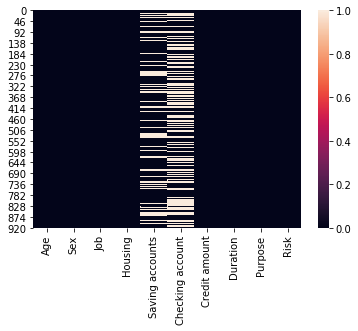

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.dropna(axis=1,inplace=True)

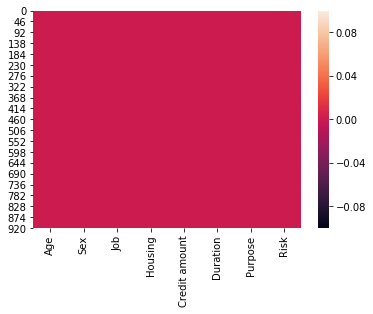

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,1169,6,radio/TV,good
1,22,female,2,own,5951,48,radio/TV,bad
2,49,male,1,own,2096,12,education,good
3,45,male,2,free,7882,42,furniture/equipment,good
4,53,male,2,free,4870,24,car,bad


In [11]:
df.isnull().sum()

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
Risk             0
dtype: int64

In [12]:
df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,1169,6,radio/TV,good
1,22,female,2,own,5951,48,radio/TV,bad
2,49,male,1,own,2096,12,education,good
3,45,male,2,free,7882,42,furniture/equipment,good
4,53,male,2,free,4870,24,car,bad


In [13]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.014991,0.032193,-0.032255
Job,0.014991,1.000000,0.287477,0.219779
Credit amount,0.032193,0.287477,1.000000,0.625466
Duration,-0.032255,0.219779,0.625466,1.000000


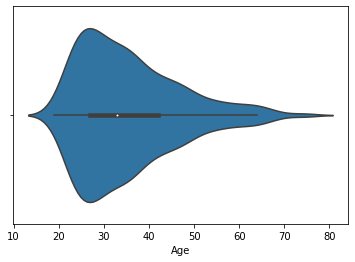

In [14]:
sns.violinplot(df['Age'])

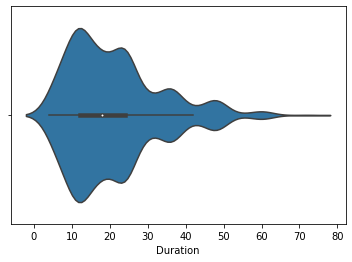

In [15]:
sns.violinplot(df['Duration'])

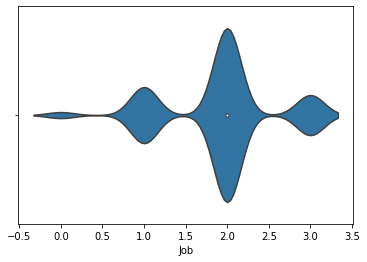

In [16]:
sns.violinplot(df['Job'])

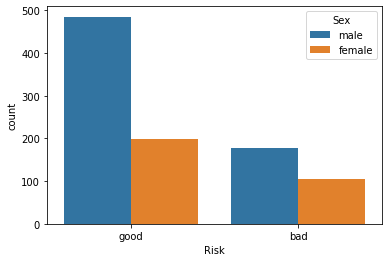

In [17]:
sns.countplot(df['Risk'],hue=df['Sex'])

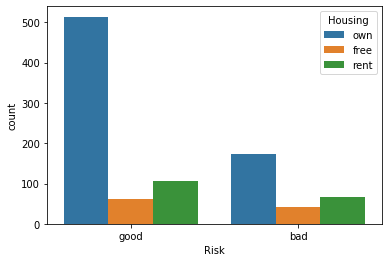

In [18]:
sns.countplot(df['Risk'],hue=df['Housing'])

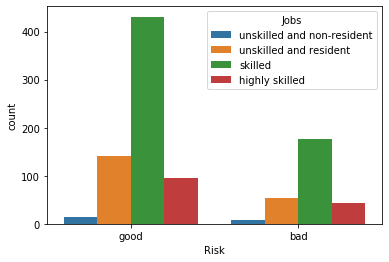

In [19]:
import matplotlib.pyplot as plt
sns.countplot(df['Risk'],hue=df['Job'])
plt.legend(['unskilled and non-resident','unskilled and resident','skilled','highly skilled'],loc='best',title='Jobs')

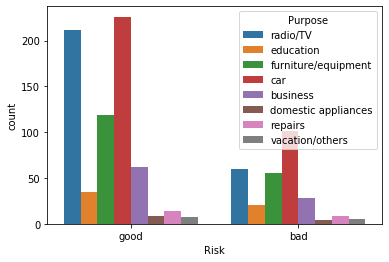

In [20]:
sns.countplot(df['Risk'],hue=df['Purpose'])

In [21]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.014991,0.032193,-0.032255
Job,0.014991,1.000000,0.287477,0.219779
Credit amount,0.032193,0.287477,1.000000,0.625466
Duration,-0.032255,0.219779,0.625466,1.000000


In [22]:
df.shape

(964, 8)

In [23]:
df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,1169,6,radio/TV,good
1,22,female,2,own,5951,48,radio/TV,bad
2,49,male,1,own,2096,12,education,good
3,45,male,2,free,7882,42,furniture/equipment,good
4,53,male,2,free,4870,24,car,bad


In [24]:
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
housing_data=pd.get_dummies(df['Housing'])
purpose_data=pd.get_dummies(df['Purpose'])
df['Risk']=LabelEncoder().fit_transform(df['Risk'])

In [25]:
df = df.merge(housing_data, left_index=True, right_index=True, how='inner')
df=df.merge(purpose_data,left_index=True,right_index=True,how='inner')
df.drop(['Housing','Purpose'],axis=1,inplace=True)

In [26]:
df.head()

,Age,Sex,Job,Credit amount,Duration,Risk,free,own,rent,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1169,6,1,0,1,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,1,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,1,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,0,1,0,0,0,1,0,0,0,0,0,0


In [27]:
df.corr()

,Age,Sex,Job,Credit amount,Duration,Risk,free,own,rent,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Age,1.000000,0.169526,0.014991,0.032193,-0.032255,0.091761,0.245558,0.007141,-0.206943,0.002967,0.085842,-0.012268,0.069026,-0.131624,-0.036883,0.041409,0.044049
Sex,0.169526,1.000000,0.083326,0.099054,0.079275,0.078588,0.105115,0.124654,-0.231979,0.070684,0.049327,-0.045197,-0.055633,-0.090074,0.006021,0.028337,0.015317
Job,0.014991,0.083326,1.000000,0.287477,0.219779,-0.015982,0.151618,-0.067344,-0.043160,-0.004650,0.051209,-0.025536,-0.030233,0.006984,-0.029505,-0.093340,0.103574
Credit amount,0.032193,0.099054,0.287477,1.000000,0.625466,-0.155595,0.204712,-0.123199,-0.020217,0.091782,0.129924,-0.070998,-0.028604,-0.034280,-0.172125,-0.030545,0.193934
Duration,-0.032255,0.079275,0.219779,0.625466,1.000000,-0.211637,0.189582,-0.075615,-0.064099,0.148163,-0.004260,-0.038431,-0.016161,-0.061945,-0.038611,-0.023812,0.105319
Risk,0.091761,0.078588,-0.015982,-0.155595,-0.211637,1.000000,-0.085973,0.137487,-0.092626,-0.013852,-0.027393,-0.010336,-0.039049,-0.025403,0.097819,-0.024260,-0.030924
free,0.245558,0.105115,0.151618,0.204712,0.189582,-0.085973,1.000000,-0.547654,-0.162631,-0.065620,0.118102,-0.039043,0.130702,-0.067568,-0.106575,0.014029,0.081589
own,0.007141,0.124654,-0.067344,-0.123199,-0.075615,0.137487,-0.547654,1.000000,-0.736501,0.046180,-0.097024,0.029940,-0.081003,-0.047695,0.143423,0.020287,-0.011410
rent,-0.206943,-0.231979,-0.043160,-0.020217,-0.064099,-0.092626,-0.162631,-0.736501,1.000000,-0.001407,0.018936,-0.003743,-0.010143,0.110870,-0.082971,-0.035265,-0.052506
business,0.002967,0.070684,-0.004650,0.091782,0.148163,-0.013852,-0.065620,0.046180,-0.001407,1.000000,-0.229916,-0.036028,-0.078934,-0.150601,-0.201186,-0.049040,-0.036028


In [28]:
df.dtypes

Age                    int64
Sex                    int32
Job                    int64
Credit amount          int64
Duration               int64
Risk                   int32
free                   uint8
own                    uint8
rent                   uint8
business               uint8
car                    uint8
domestic appliances    uint8
education              uint8
furniture/equipment    uint8
radio/TV               uint8
repairs                uint8
vacation/others        uint8
dtype: object

In [29]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [30]:
X=df.drop(['Risk'],axis=1)
y=df['Risk']
kf = KFold(n_splits=100)
kf.get_n_splits(X)

100

In [31]:
forest =RandomForestClassifier(n_estimators=1000)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    forest.fit(X_train,y_train)

In [32]:
predicted=forest.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.88      0.93         8

    accuracy                           0.89         9
   macro avg       0.75      0.94      0.80         9
weighted avg       0.94      0.89      0.90         9



In [35]:
print(confusion_matrix(y_test,predicted))

[[1 0]
 [1 7]]


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
X=df.drop('Risk',axis=1)
y=df['Risk']
kf = KFold(n_splits=6)
kf.get_n_splits(X)

6

In [38]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [39]:
logModelKFold =LogisticRegression()
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logModelKFold.fit(X_train,y_train)

In [40]:
pre=logModelKFold.predict(X_test)

In [41]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.80      0.17      0.28        47
           1       0.74      0.98      0.84       113

    accuracy                           0.74       160
   macro avg       0.77      0.58      0.56       160
weighted avg       0.76      0.74      0.68       160



In [42]:
print(confusion_matrix(y_test,pre))

[[  8  39]
 [  2 111]]
